In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter 

In [2]:
#loading the dataset

df1 = pd.read_csv('train.csv').drop(columns=['Artist Name', 'Track Name'])
df2 = pd.read_csv('test.csv').drop(columns=['Artist Name', 'Track Name'])

df = pd.concat([df1,df2])


keys = df.keys()
numcols = len(keys)
df


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.00000,4,5.0
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.00000,4,10.0
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.00000,4,6.0
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.00000,4,5.0
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.00000,4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,28.0,0.816,0.927,7.0,-1.581,1,0.0600,0.264000,NaN,0.0735,0.6430,128.019,231680.00000,4,NaN
7709,45.0,0.429,0.599,7.0,-7.236,0,0.0363,0.025400,0.009330,0.3620,0.2570,127.446,367879.00000,4,NaN
7710,38.0,0.805,0.905,6.0,-7.222,0,0.2750,0.159000,0.000011,0.0590,0.6910,135.224,2.45355,4,NaN
7711,51.0,0.801,0.930,9.0,-7.365,1,0.0354,0.080600,0.152000,0.0558,0.9670,133.255,221320.00000,4,NaN


In [3]:
#check for missing values
for k in keys:
    print(f'column {k} has {np.round(df[k].isna().sum()/len(df)*100, 2)}% missing values')



column Popularity has 2.55% missing values
column danceability has 0.0% missing values
column energy has 0.0% missing values
column key has 10.98% missing values
column loudness has 0.0% missing values
column mode has 0.0% missing values
column speechiness has 0.0% missing values
column acousticness has 0.0% missing values
column instrumentalness has 24.45% missing values
column liveness has 0.0% missing values
column valence has 0.0% missing values
column tempo has 0.0% missing values
column duration_in min/ms has 0.0% missing values
column time_signature has 0.0% missing values
column Class has 30.0% missing values


In [4]:
#Populatirity has 2.55% missing values -> can be filled
#key, instrumentalness and the Target have very high missing value rates -> mvs should be removed as to not alter the 
#distribution

df = df[df['instrumentalness'].notna()]
df = df[df['key'].notna()]
df = df[df['Class'].notna()]

target = df['Class']
numTargets = len(set(target))
df.drop(columns=['Class'], inplace = True)
keys = df.keys()
numcols = len(keys)

target

#Fill Popularity mv with median, because all popularities seem to be integer
df.fillna(np.mean(df['Popularity']), inplace = True)
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4


In [5]:
#Univariate Analysis
means = {}
medians = {}
stdevs = {}
for k in keys:
    mean = np.mean(df[df[k].notna()][k])
    med = np.median(df[df[k].notna()][k])
    std = np.sqrt(np.mean((df[k]-mean)**2))
    means[k] = mean
    medians[k] = med
    stdevs[k] = std

means,medians,stdevs

({'Popularity': 43.100651824261405,
  'danceability': 0.5251725181998677,
  'energy': 0.6688955195483124,
  'key': 5.970632031767042,
  'loudness': -8.237904616148246,
  'mode': 0.6242554599602912,
  'speechiness': 0.07114425876902714,
  'acousticness': 0.24199309718481135,
  'instrumentalness': 0.17897097180592322,
  'liveness': 0.1949859116479153,
  'valence': 0.4697853077432164,
  'tempo': 122.84167720052946,
  'duration_in min/ms': 210976.15494809728,
  'time_signature': 3.913385175380543},
 {'Popularity': 43.0,
  'danceability': 0.527,
  'energy': 0.715,
  'key': 6.0,
  'loudness': -7.318,
  'mode': 1.0,
  'speechiness': 0.0463,
  'acousticness': 0.0571,
  'instrumentalness': 0.00422,
  'liveness': 0.128,
  'valence': 0.461,
  'tempo': 120.034,
  'duration_in min/ms': 216906.5,
  'time_signature': 4.0},
 {'Popularity': 16.37825683351091,
  'danceability': 0.16593122541996164,
  'energy': 0.2435212424471066,
  'key': 3.1700974851144297,
  'loudness': 4.286297689144497,
  'mode': 0.

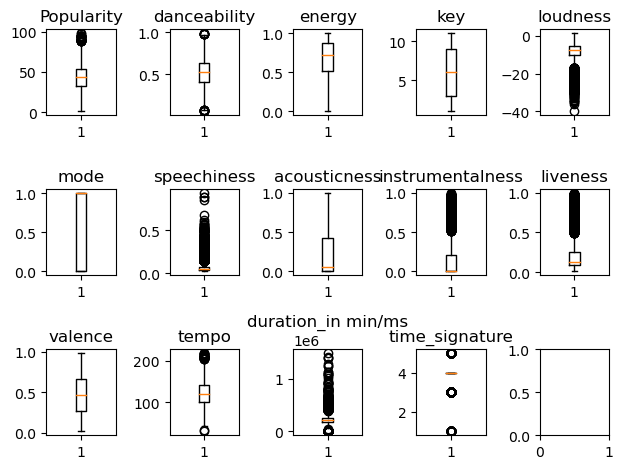

In [6]:
#Visualise each distribution using a boxplot
n = 3
m = 5
fig, axs = plt.subplots(n,m)


for i in range(n):
    for j in range(m):
        idx = i*m+j 
        if (idx < numcols):
            axs[i][j].boxplot(df[keys[idx]])
            axs[i][j].title.set_text(keys[idx])
            
plt.tight_layout()

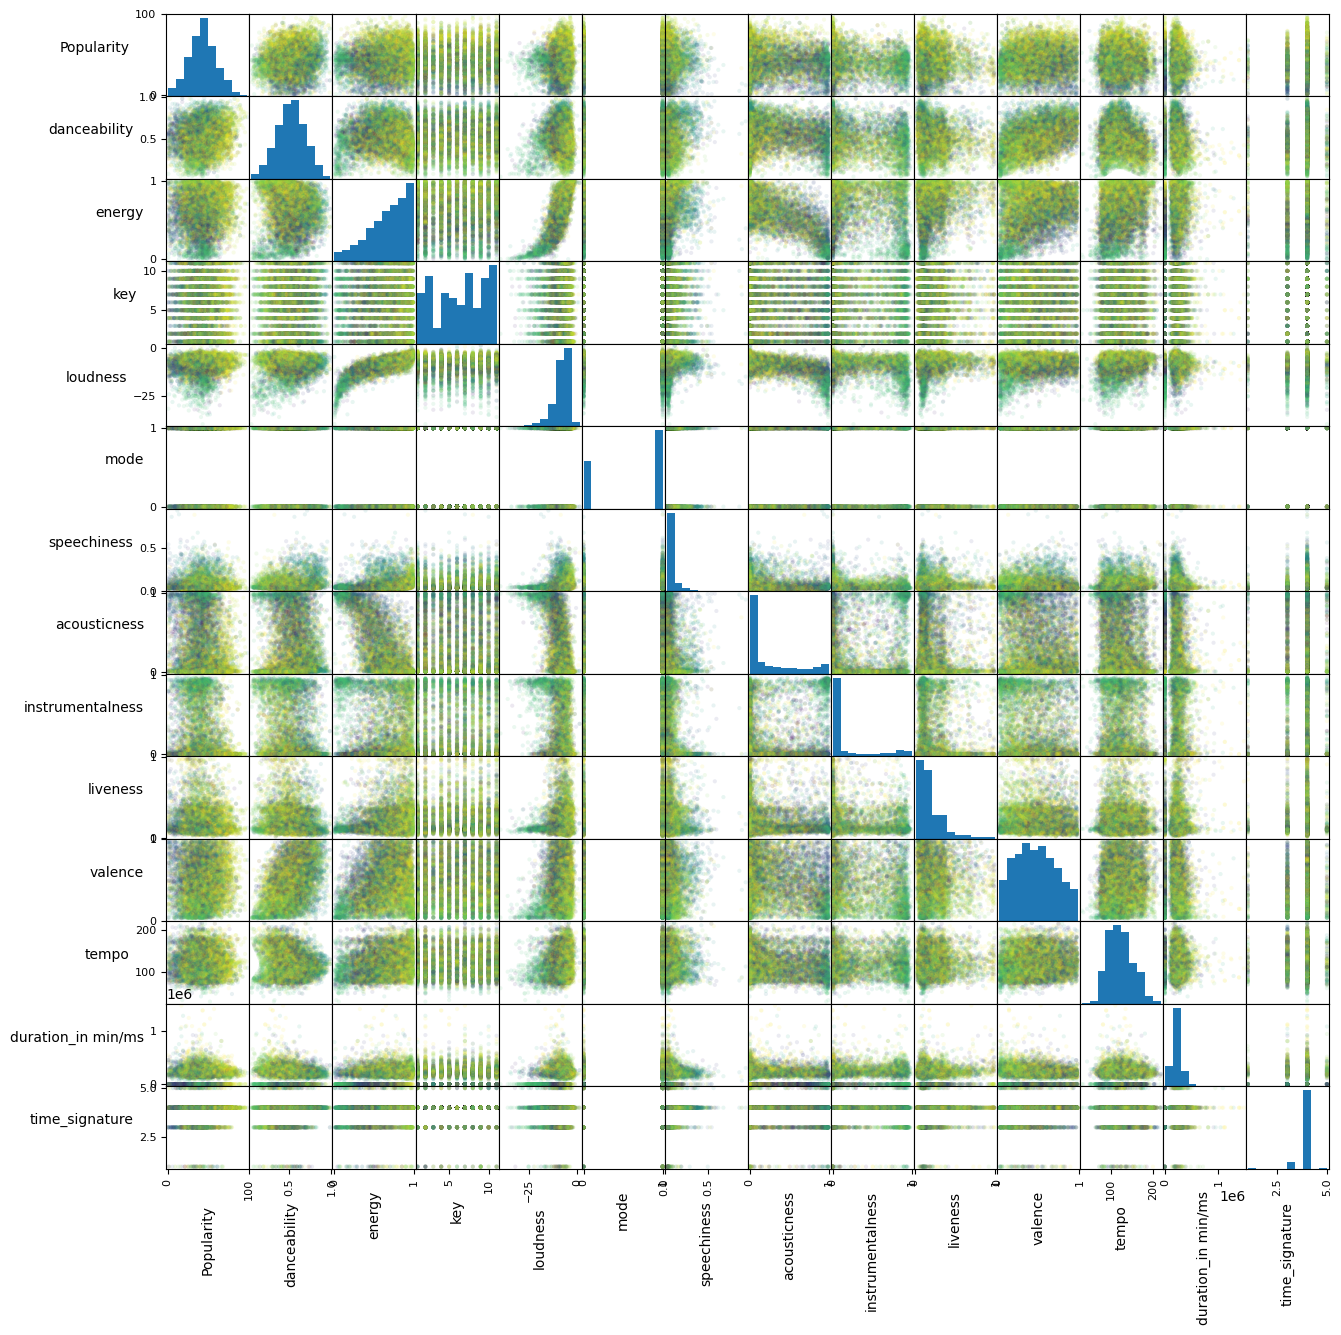

In [7]:
#Bivariate Analysis
#Visualize each pair of variables

axes = pd.plotting.scatter_matrix(df, alpha = 0.1, figsize = (15,15), c  =target);
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

In [8]:
#Normalisation
#No strong non linear dependence can be seen in above plots.
#as such a simple min max scaler to the [0,1] intervall is used
maxs = np.max(df, axis = 0)
mins = np.min(df, axis = 0)


for k in keys:
    df[k] = (df[k]-mins[k])/(maxs[k]-mins[k])

#repeat means and stdev calculation
means = {}
medians = {}
stdevs = {}
for k in keys:
    mean = np.mean(df[df[k].notna()][k])
    med = np.median(df[df[k].notna()][k])
    std = np.sqrt(np.mean((df[k]-mean)**2))
    means[k] = mean
    medians[k] = med
    stdevs[k] = std

    
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,0.546392,0.346890,0.813996,0.2,0.792166,1.0,0.019836,0.001104,4.025104e-03,0.090909,0.572632,0.459689,0.170413,0.75
2,0.350515,0.402841,0.613992,0.5,0.765439,1.0,0.032877,0.487952,1.957833e-04,0.389858,0.799314,0.626804,0.074240,0.75
4,0.536082,0.115558,0.974999,0.1,0.863607,1.0,0.212055,0.000170,1.616367e-02,0.163351,0.076427,0.901766,0.155674,0.75
5,0.536082,0.188724,0.977000,0.5,0.988452,1.0,0.092603,0.003544,6.063259e-03,0.163351,0.231569,0.655013,0.140898,0.75
6,0.484536,0.661072,0.657993,0.4,0.733653,0.0,0.089315,0.405622,3.413658e-07,0.087950,0.684933,0.603316,0.222982,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,0.350515,0.114482,0.108982,0.6,0.553223,0.0,0.020603,0.996988,8.273091e-01,0.088256,0.165020,0.754740,0.130958,0.50
17992,0.268041,0.622337,0.222984,1.0,0.720895,0.0,0.011397,0.861446,1.516066e-05,0.059790,0.329313,0.227225,0.174024,0.75
17993,0.340206,0.536260,0.981000,0.3,0.853826,0.0,0.053370,0.000030,1.355423e-04,0.667381,0.253405,0.398391,0.146374,0.75
17994,0.288660,0.167205,0.804996,0.5,0.658363,0.0,0.122192,0.001295,9.196786e-01,0.249056,0.350109,0.539476,0.148724,0.75


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
Popularity,1.000000,0.138493,0.058448,0.008350,0.106454,0.008344,-0.004779,-0.125402,-0.168285,-0.079037,0.056410,-0.004393,0.004436,0.064813
danceability,0.138493,1.000000,-0.091391,0.009577,0.047340,-0.050560,0.102219,0.026588,-0.201740,-0.116994,0.453689,-0.180883,-0.115942,0.118482
energy,0.058448,-0.091391,1.000000,0.031098,0.791899,-0.038302,0.185379,-0.761481,-0.170530,0.199428,0.208241,0.220830,0.266403,0.143421
key,0.008350,0.009577,0.031098,1.000000,0.015707,-0.113281,-0.000707,-0.018390,0.001411,0.016809,0.035967,0.015797,0.020193,0.008902
loudness,0.106454,0.047340,0.791899,0.015707,1.000000,-0.034533,0.129582,-0.642993,-0.337065,0.121293,0.181081,0.176637,0.215244,0.116684
mode,0.008344,-0.050560,-0.038302,-0.113281,-0.034533,1.000000,-0.045212,0.027128,-0.016921,-0.013829,-0.002270,0.015583,-0.057590,-0.011365
speechiness,-0.004779,0.102219,0.185379,-0.000707,0.129582,-0.045212,1.000000,-0.101481,-0.073457,0.084566,0.004253,0.089123,0.006713,0.039067
acousticness,-0.125402,0.026588,-0.761481,-0.018390,-0.642993,0.027128,-0.101481,1.000000,0.167065,-0.115549,-0.120091,-0.178449,-0.357741,-0.136113
instrumentalness,-0.168285,-0.201740,-0.170530,0.001411,-0.337065,-0.016921,-0.073457,0.167065,1.000000,-0.041077,-0.221148,-0.027825,0.002303,-0.065425
liveness,-0.079037,-0.116994,0.199428,0.016809,0.121293,-0.013829,0.084566,-0.115549,-0.041077,1.000000,0.014473,0.031703,0.068830,0.017582


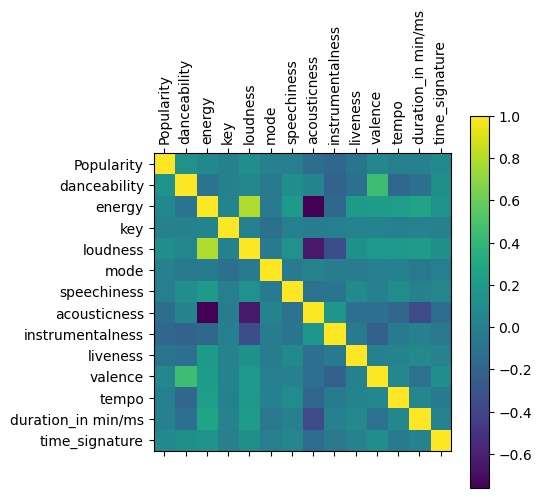

In [9]:
#Calculate and visualize Correlation between each pair of variables

correlations = df.corr()

plt.matshow(correlations)
plt.colorbar()
plt.xticks(range(numcols), keys, rotation = 90);
plt.yticks(range(numcols), keys, rotation = 0);
correlations

In [10]:
#Only one highly correlated variable pair obvious, which is "energy" and "loudness", a correlation that could have
#been expected.
#Witch a correlation of .795 this variable can be removed while barely losing any information.

df.drop(columns=['loudness'], inplace = True)
keys = df.keys()
df

,Popularity,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,0.546392,0.346890,0.813996,0.2,1.0,0.019836,0.001104,4.025104e-03,0.090909,0.572632,0.459689,0.170413,0.75
2,0.350515,0.402841,0.613992,0.5,1.0,0.032877,0.487952,1.957833e-04,0.389858,0.799314,0.626804,0.074240,0.75
4,0.536082,0.115558,0.974999,0.1,1.0,0.212055,0.000170,1.616367e-02,0.163351,0.076427,0.901766,0.155674,0.75
5,0.536082,0.188724,0.977000,0.5,1.0,0.092603,0.003544,6.063259e-03,0.163351,0.231569,0.655013,0.140898,0.75
6,0.484536,0.661072,0.657993,0.4,0.0,0.089315,0.405622,3.413658e-07,0.087950,0.684933,0.603316,0.222982,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,0.350515,0.114482,0.108982,0.6,0.0,0.020603,0.996988,8.273091e-01,0.088256,0.165020,0.754740,0.130958,0.50
17992,0.268041,0.622337,0.222984,1.0,0.0,0.011397,0.861446,1.516066e-05,0.059790,0.329313,0.227225,0.174024,0.75
17993,0.340206,0.536260,0.981000,0.3,0.0,0.053370,0.000030,1.355423e-04,0.667381,0.253405,0.398391,0.146374,0.75
17994,0.288660,0.167205,0.804996,0.5,0.0,0.122192,0.001295,9.196786e-01,0.249056,0.350109,0.539476,0.148724,0.75


In [11]:
#Map Each cluster label to what true label it most labels
def mapPredAndTrue(tar, pred):
    convMat = np.array(confusion_matrix(tar, pred, normalize = 'true'))
    
    
    translation = np.argmax(convMat, axis = 0)

    predLabel = pred.copy()

    return translation[predLabel]

In [ ]:
#Agglomerative Clustering approach

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score

from tqdm import tqdm

uppLimFak = 3
silhouetteScores = []
homogeneityScores = []

clusterings = []
possMetrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
nClustersToCheck = range(numTargets, uppLimFak*numTargets)

#Gridsearch for hyperparameter optimisation
for nClust in tqdm(nClustersToCheck):
    ss = []
    sh = []
    c = []
    for m in possMetrics:
        
        if (m == 'euclidean'):
            l = 'ward'
        else:
            #found to be best by trial and error
            l = 'average'
        
        clustering = AgglomerativeClustering(n_clusters = nClust, linkage = l, metric = m).fit(df)
        c.append(clustering)
        ss.append(silhouette_score(df, clustering.labels_))
        sh.append(homogeneity_score(mapPredAndTrue(target, clustering.labels_), target))
        
    clusterings.append(c)
    silhouetteScores.append(ss)
    homogeneityScores.append(sh)

    


plt.imshow(np.array(silhouetteScores).T)

plt.yticks(range(len(possMetrics)), possMetrics);
plt.xticks(np.array(nClustersToCheck)-numTargets, nClustersToCheck);
plt.ylabel('Metrics')
plt.xlabel('number of clusters')
plt.title('Silhouette Score')


plt.colorbar();

 59%|█████████████████████████▍                 | 13/22 [09:10<06:26, 42.94s/it]

In [ ]:
plt.imshow(np.array(homogeneityScores).T)

plt.yticks(range(len(possMetrics)), possMetrics);
plt.xticks(np.array(nClustersToCheck)-numTargets, nClustersToCheck);
plt.ylabel('Metrics')
plt.xlabel('number of clusters')
plt.title('Homogeneity Score')



plt.colorbar();


clusterings = np.reshape(clusterings, (-1, 1))
silhouetteScores = np.reshape(silhouetteScores, (-1, 1))
homogeneityScores = np.reshape(homogeneityScores, (-1, 1))


In [ ]:
aggCluster = clusterings[np.argmax(homogeneityScores)][0]
#aggCluster = AgglomerativeClustering(n_clusters = 13, linkage = 'average', metric = 'l2').fit(df)

aggPred = aggCluster.labels_


aggPredTrueLabel = mapPredAndTrue(target, aggPred)


np.count_nonzero([aggPredTrueLabel == target])/len(target)

homogeneity_score(aggPredTrueLabel, target),silhouette_score(df, aggCluster.labels_)

In [ ]:
predictedClasses = list(set(aggPredTrueLabel))

plt.bar(predictedClasses, [np.count_nonzero([aggPredTrueLabel == i]) for i in predictedClasses], 
        label = 'Predicted classes', color = 'blue', alpha = 0.4)

plt.bar(range(numTargets), [np.count_nonzero([target == i]) for i in range(numTargets)], 
        label = 'Predicted classes', color = 'orange', alpha = 0.4);

#some classes are not predicted at all
#frequencies of predicted and true labels are don't match at all
#Data seems not to work well with agglomerative clustering

In [ ]:
#Visualize clusters

axes = pd.plotting.scatter_matrix(df, alpha = 0.1, figsize = (15,15), c= aggPredTrueLabel);
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')